## 重回帰分析

In [ ]:
import pandas as pd
my_url = 'http://www.liquidasset.com/winedata.html'
tmp = pd.read_table(my_url, skiprows=62, nrows=38, sep='\\s+', na_values='.')
tmp.describe()

,OBS,VINT,LPRICE2,WRAIN,DEGREES,HRAIN,TIME_SV
count,38.000000,38.000000,27.000000,38.000000,37.000000,38.000000,38.000000
mean,19.500000,1970.500000,-1.451765,605.000000,16.522973,137.000000,12.500000
std,11.113055,11.113055,0.634588,135.283087,0.662480,66.740725,11.113055
min,1.000000,1952.000000,-2.288790,376.000000,14.983300,38.000000,-6.000000
25%,10.250000,1961.250000,-1.985365,510.250000,16.166700,87.500000,3.250000
50%,19.500000,1970.500000,-1.509260,586.500000,16.533300,120.500000,12.500000
75%,28.750000,1979.750000,-1.052200,713.500000,17.066700,171.000000,21.750000
max,38.000000,1989.000000,0.000000,845.000000,17.650000,292.000000,31.000000


In [ ]:
my_data = tmp.iloc[:, 2:].dropna()
my_data.head()

,LPRICE2,WRAIN,DEGREES,HRAIN,TIME_SV
0,-0.99868,600,17.1167,160,31
1,-0.45440,690,16.7333,80,30
3,-0.80796,502,17.1500,130,28
5,-1.50926,420,16.1333,110,26
6,-1.71655,582,16.4167,187,25


In [ ]:
my_data.shape

(27, 5)

In [ ]:
my_data.to_csv('wine.csv', index=False)

In [ ]:
#my_data = pd.read_csv(wine.csv',) # 作ったcsvを使う場合
my_url = ('https://raw.githubusercontent.com/taroyabuki'
    '/fromzero/master/data/wine.csv'
)
my_data = pd.read_csv(my_url)

In [ ]:
my_data.head()

,LPRICE2,WRAIN,DEGREES,HRAIN,TIME_SV
0,-0.99868,600,17.1167,160,31
1,-0.45440,690,16.7333,80,30
2,-0.80796,502,17.1500,130,28
3,-1.50926,420,16.1333,110,26
4,-1.71655,582,16.4167,187,25


In [ ]:
# p.228
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, LeaveOneOut

my_url = ('https://raw.githubusercontent.com/taroyabuki'
    '/fromzero/master/data/wine.csv'
)
my_data = pd.read_csv(my_url)
X, y = my_data.drop(columns=['LPRICE2']), my_data['LPRICE2']

my_model = LinearRegression().fit(X, y)

In [ ]:
my_model.intercept_

-12.145333576510417

In [ ]:
pd.Series(my_model.coef_,
          index=X.columns)

WRAIN      0.001167
DEGREES    0.616392
HRAIN     -0.003861
TIME_SV    0.023847
dtype: float64

In [ ]:
my_test = [[500, 17, 120, 2]]
my_model.predict(my_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-1.49884253])

In [ ]:
y_ = my_model.predict(X)
rmse = mean_squared_error(y_, y)**0.5 # RMSE(訓練)
print('RMSE(訓練):', rmse)

r1 = my_model.score(X, y) # 決定係数1
print('決定係数1:', r1)

r6 = np.corrcoef(y, y_)[0, 1]**2 # 決定係数6
print('決定係数6,:', r6)

RMSE(訓練): 0.2586166620130619
決定係数1: 0.8275277990052158
決定係数6,: 0.8275277990052158


In [ ]:
my_scores = cross_val_score(my_model,
                            X,
                            y,
                            cv=LeaveOneOut(),
                            scoring='neg_mean_squared_error')
(-my_scores.mean())**0.5

0.3230042651841197

In [ ]:
# 補足：行列計算による再現
import numpy as np

M = np.matrix(X.assign(b0=1))
b = np.linalg.pinv(M) @ y
pd.Series(b,
          index = list(X.columns) + ['b0'])


WRAIN       0.001167
DEGREES     0.616392
HRAIN      -0.003861
TIME_SV     0.023847
b0        -12.145334
dtype: float64

<Axes: >

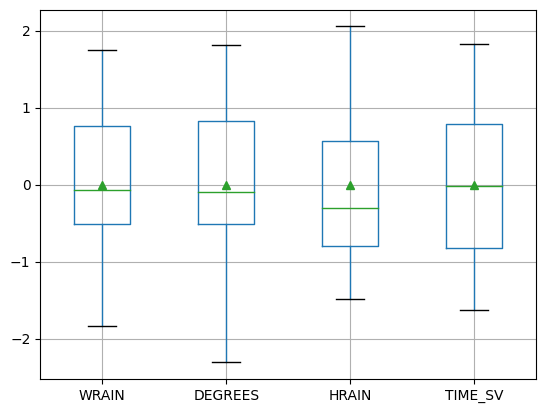

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_url = ('https://raw.githubusercontent.com/taroyabuki'
    '/fromzero/master/data/wine.csv'
)
my_data = pd.read_csv(my_url)
X, y = my_data.drop(columns=['LPRICE2']), my_data['LPRICE2']

# StandardScalerで標準化した結果をデータフレームに戻してから描画する
pd.DataFrame(StandardScaler().fit_transform(X),  columns=X.columns).boxplot(showmeans=True)

In [ ]:
my_pipline = Pipeline([
    ('sc', StandardScaler()),
    ('lr', LinearRegression())
])
my_pipline.fit(X, y)

Pipeline(steps=[('sc', StandardScaler()), ('lr', LinearRegression())])

In [ ]:
# 線型怪奇の部分だけを取り出す
my_lr = my_pipline.named_steps.lr
my_lr.intercept_


-1.4517651851851847

In [ ]:
pd.Series(my_lr.coef_,
          index=X.columns)


WRAIN      0.147741
DEGREES    0.398724
HRAIN     -0.276802
TIME_SV    0.192979
dtype: float64

In [ ]:
my_test = [[500, 17, 120, 2]]
my_pipline.predict(my_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-1.49884253])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, LeaveOneOut

my_url = ('https://raw.githubusercontent.com/taroyabuki'
    '/fromzero/master/data/wine.csv'
)
my_data = pd.read_csv(my_url)
X, y = my_data.drop(columns=['LPRICE2']), my_data['LPRICE2']

n = len(my_data)
my_data2 = my_data.assign(v1=[i % 2 for i in range(n)],
                          v2=[i % 3 for i in range(n)])
my_data2.head()

,LPRICE2,WRAIN,DEGREES,HRAIN,TIME_SV,v1,v2
0,-0.99868,600,17.1167,160,31,0,0
1,-0.45440,690,16.7333,80,30,1,1
2,-0.80796,502,17.1500,130,28,0,2
3,-1.50926,420,16.1333,110,26,1,0
4,-1.71655,582,16.4167,187,25,0,1


In [ ]:
X2, y2 = my_data2.drop(columns=['LPRICE2']), my_data['LPRICE2']
my_model2 = LinearRegression().fit(X2, y2)

y2_ = my_model2.predict(X2)
mean_squared_error(y2_, y2)**0.5


0.2562120047505748

In [ ]:
my_scores2 = cross_val_score(
    my_model2, X2, y2,
    cv=LeaveOneOut(),
    scoring='neg_mean_squared_error'
)
(-my_scores2.mean())**0.5

0.356991803592894

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.pipeline import Pipeline

my_url = ('https://raw.githubusercontent.com/taroyabuki'
    '/fromzero/master/data/wine.csv'
)
my_data = pd.read_csv(my_url)

n = len(my_data)
my_data2 = my_data.assign(v1=[i % 2 for i in range(n)],
                          v2=[i % 3 for i in range(n)])
X, y = my_data2.drop(columns=['LPRICE2']), my_data['LPRICE2']


In [11]:
my_sfs = SequentialFeatureSelector(
    estimator=LinearRegression(),
    direction='forward', # 変数増加法
    cv=LeaveOneOut(),
    scoring='neg_mean_squared_error'
    )
my_pipeline = Pipeline([      # 変数選択の後で再訓練を行うようにする
    ('sfs', my_sfs),           # 変数選択
    ('lr', LinearRegression())  # 回帰分析
])

my_params = {'sfs__n_features_to_select': range(1, 6)} # 選択する変数の上限
my_search = GridSearchCV(
    estimator=my_pipeline,
    param_grid=my_params,
    cv=LeaveOneOut(),
    scoring='neg_mean_squared_error',
    n_jobs=-1
).fit(X, y)
my_model1 = my_search.best_estimator_ # 最後のパラメータで再訓練したモデル
my_search.best_estimator_.named_steps.sfs.get_support()

array([ True,  True,  True,  True, False, False])

In [1]:
# 8.6 補足：正則化

import numpy as np
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, ElasticNet, enet_path
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

my_url = ('https://raw.githubusercontent.com/taroyabuki'
    '/fromzero/master/data/wine.csv'
)
my_data = pd.read_csv(my_url)
X, y = my_data.drop(columns=['LPRICE2']), my_data['LPRICE2']



In [2]:
A = 2
B = 0.1

my_pipeline = Pipeline([
    ('sc', StandardScaler()),
    ('enet', ElasticNet(
        alpha=A,
        l1_ratio=B
    ))
])
my_pipeline.fit(X, y)

Pipeline(steps=[('sc', StandardScaler()),
                ('enet', ElasticNet(alpha=2, l1_ratio=0.1))])

In [3]:
my_enet = my_pipeline.named_steps.enet
my_enet.intercept_

-1.4517651851851852

In [4]:
pd.Series(my_enet.coef_,
          index=X.columns)

WRAIN      0.000000
DEGREES    0.074101
HRAIN     -0.041159
TIME_SV    0.024027
dtype: float64

In [5]:
my_test = pd.DataFrame(
    [[500, 17, 120, 2]]
)
my_pipeline.predict(my_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-1.41981616])

<Axes: xlabel='log A ( = log alpha)', ylabel='Coefficients'>

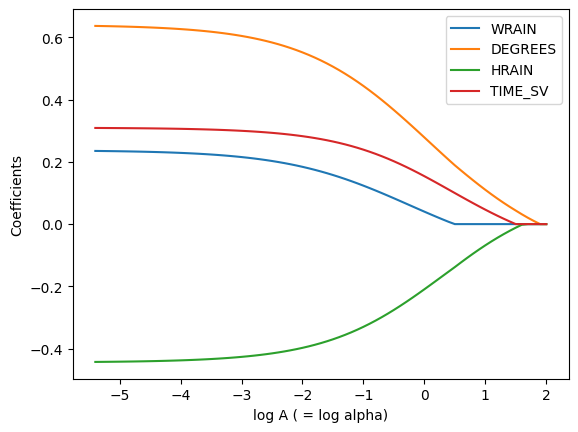

In [6]:
As = np.e**np.arange(2, -5.5, -0.1)
B = 0.1

_, my_path, _ = enet_path(
    zscore(X), zscore(y),
    alphas=As,
    l1_ratio=B
)

pd.DataFrame(
    my_path.T,
    columns=X.columns,
    index=np.log(As)
).plot(
    xlabel='log A ( = log alpha)',
    ylabel='Coefficients'
)

In [7]:
As = np.linspace(0, 0.1, 21)
Bs = np.linspace(0, 0.1,  6)

my_pipeline = Pipeline([
    ('sc', StandardScaler()),
    ('enet', ElasticNet())
])
my_search = GridSearchCV(
    estimator=my_pipeline,
    param_grid={'enet__alpha':As, 'enet__l1_ratio': Bs},
    cv=LeaveOneOut(),
    scoring='neg_mean_squared_error',
    n_jobs=-1
).fit(X, y)

my_model = my_search.best_estimator_ # 最良モデル

my_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.181e+00, tolerance: 1.047e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


{'enet__alpha': 0.075, 'enet__l1_ratio': 0.0}

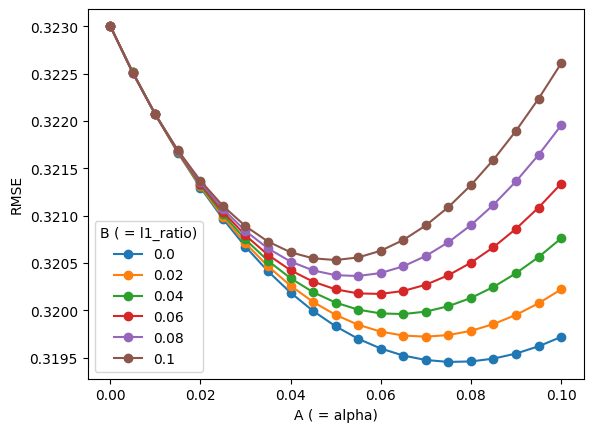

In [9]:
tmp = my_search.cv_results_ # チューニングの詳細
my_scores = (-tmp['mean_test_score'])**0.5 # RMSE

my_results = pd.DataFrame(tmp['params']).assign(RMSE=my_scores).pivot(
    index='enet__alpha',
    columns='enet__l1_ratio',
    values='RMSE'
)

my_results.plot(style='o-', xlabel='A ( = alpha)', ylabel='RMSE').legend(
    title='B ( = l1_ratio)'
)

In [10]:
(-my_search.best_score_)**0.5

0.31945619679509646

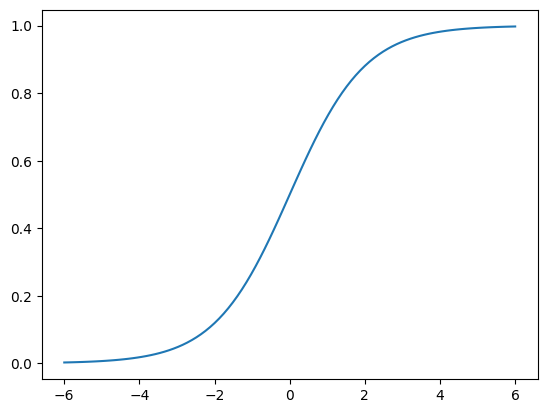

In [11]:
# 8.7 ニューラルネットワーク
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6, 6, 100)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)

In [12]:
import numpy as np
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_url = ('https://raw.githubusercontent.com/taroyabuki'
    '/fromzero/master/data/wine.csv'
)
my_data = pd.read_csv(my_url)
X, y = my_data.drop(columns=['LPRICE2']), my_data['LPRICE2']



In [13]:
warnings.simplefilter("ignore", ConvergenceWarning)
my_pipeline = Pipeline([
    ('sc', StandardScaler()),
    ('mlp', MLPRegressor())
])

my_pipeline.fit(X, y)

my_scores = cross_val_score(my_pipeline, X, y, cv=LeaveOneOut(),
                            scoring='neg_mean_squared_error')
warnings.simplefilter("default", ConvergenceWarning)

In [14]:
(-my_scores.mean())**0.5

0.42212960571290825

In [15]:
my_pipeline = Pipeline([
    ('sc', StandardScaler()),
    ('mlp', MLPRegressor(tol=1e-5,
                         max_iter=5000))
])
my_layers = (1,3,5,
             (1, 1), (3, 1), (5, 1),(1, 2),(3, 2),(5, 2))
my_params = {'mlp__hidden_layer_sizes': my_layers}
my_search = GridSearchCV(estimator=my_pipeline,
                         param_grid=my_params,
                         cv=LeaveOneOut(),
                         scoring='neg_mean_squared_error',
                         n_jobs=-1).fit(X, y)

my_model = my_search.best_estimator_ # 最良モデル
my_search.best_params_ # 最良パラメータ



{'mlp__hidden_layer_sizes': 3}

In [16]:
(-my_search.best_score_)**0.5

0.4145508872959486